## Import Modules

In [1]:
import glob 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sys, os, nilearn
from nilearn import input_data, datasets
from nilearn import plotting


c:\users\shelby\anaconda3\envs\shelby_neuroimaging\lib\site-packages\nilearn\datasets\__init__.py:96: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)


# Set up masker

c:\users\shelby\anaconda3\envs\shelby_neuroimaging\lib\site-packages\nilearn\plotting\img_plotting.py:341: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()


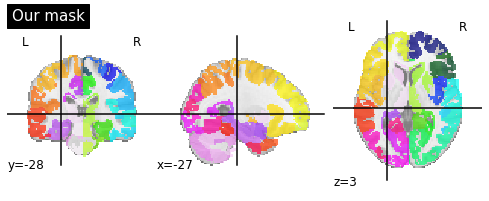

In [2]:
shen_file       = '../data_realcost/masker/shen_2mm_268_parcellation.nii'

shen_masker = input_data.NiftiLabelsMasker(shen_file, 
                                             detrend     = True, 
                                             standardize = True,
                                             high_pass   = 0.01, 
                                             t_r         = 1.0,  #check!
                                             low_pass    = 0.12 );


nilearn.plotting.plot_roi(shen_file, title='Our mask');

In [6]:
def choose_mask(file,detrnd="True",stndrd="True",hp="0.01",tr="2.0",lp="0.12"):
    mask  = '../data_realcost/masker/'+ file +'.nii'
    
    masker = input_data.NiftiLabelsMasker(mask, 
                                             detrend     = detrnd, 
                                             standardize = stndrd,
                                             high_pass   = hp, 
                                             t_r         = tr, 
                                             low_pass    = lp );
    
    nilearn.plotting.plot_roi(mask, title='Our mask');
        
    return masker

choose_mask(shen_2mm_268_parcellation)

NameError: name 'shen_2mm_268_parcellation' is not defined

In [12]:
raw_data_path = '/Users/ralfschmaelzle/Desktop/DT/SHELBY_DATA/REALCOST/data/00_func_data/niis/'
motion_data_path = '/Users/ralfschmaelzle/Desktop/DT/SHELBY_DATA/REALCOST/data/00_func_data/motion/'
subjs = [f for f in os.listdir(raw_data_path)]
subjs
n_subjs = len(subjs)
n_subjs

40

In [14]:
##subjs
for curr_subject in subjs:
    print(curr_subject)
    data_file =  raw_data_path + curr_subject ###'/Users/ralfschmaelzle/Desktop/DT/SHELBY_DATA/REALCOST/data/00_func_data/niis/PSA003_swrealcost_run01_st.nii'
    motion_file = motion_data_path + curr_subject[:6] + '_rp_realcost_run01_st.txt'
    
    time_series = shen_masker.fit_transform(data_file, confounds = motion_file)
    outname = '../data_realcost/' + curr_subject[:6] + '_shen_extracted_hp001_lp012_ltr_stand.npy'
    np.save(outname , time_series)


PSA038_swrealcost_run01_st.nii
PSA009_swrealcost_run01_st.nii
PSA078_swrealcost_run01_st.nii
PSA153_swrealcost_run01_st.nii
PSA131_swrealcost_run01_st.nii
PSA086_swrealcost_run01_st.nii
PSA144_swrealcost_run01_st.nii
PSA108_swrealcost_run01_st.nii
PSA030_swrealcost_run01_st.nii
PSA041_swrealcost_run01_st.nii
PSA068_swrealcost_run01_st.nii
PSA056_swrealcost_run01_st.nii
PSA132_swrealcost_run01_st.nii
PSA019_swrealcost_run01_st.nii
PSA027_swrealcost_run01_st.nii
PSA028_swrealcost_run01_st.nii
PSA016_swrealcost_run01_st.nii
PSA005_swrealcost_run01_st.nii
PSA061_swrealcost_run01_st.nii
PSA010_swrealcost_run01_st.nii
PSA128_swrealcost_run01_st.nii
PSA003_swrealcost_run01_st.nii
PSA156_swrealcost_run01_st.nii
PSA119_swrealcost_run01_st.nii
PSA032_swrealcost_run01_st.nii
PSA127_swrealcost_run01_st.nii
PSA079_swrealcost_run01_st.nii
PSA094_swrealcost_run01_st.nii
PSA008_swrealcost_run01_st.nii
PSA036_swrealcost_run01_st.nii
PSA112_swrealcost_run01_st.nii
PSA007_swrealcost_run01_st.nii
PSA151_s

In [ ]:
#all293_masker.fit('/Users/ralfschmaelzle/Documents/GITHUB/nomcomm/PAPERS_WORKING/LPP/data/bids/sub-EN107/func/sub-EN107_task-lppEN_run-08_space-MNIColin27_desc-preproc_bold.nii.gz')

# Extract one file


# Loop over files